# **FINAL PROJECT**


## **Load Data**

In [54]:
from google.colab import files
uploaded = files.upload()


In [55]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv("MAINDATA (1).csv", encoding="ISO-8859-1")
df.head()


,Player,Pos,Tm,Opp,Res,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,PF,BOS,NYK,W,30.30,14,18,0.778,8,...,4,4,10,1,1,1,1,37,38.1,22/10/2024
1,Anthony Davis,PF,LAL,MIN,W,37.58,11,23,0.478,1,...,13,16,4,1,3,1,1,36,34.0,22/10/2024
2,Derrick White,SG,BOS,NYK,W,26.63,8,13,0.615,6,...,3,3,4,1,0,0,1,24,22.4,22/10/2024
3,Jrue Holiday,PG,BOS,NYK,W,30.52,7,9,0.778,4,...,2,4,4,1,0,0,2,18,19.5,22/10/2024
4,Miles McBride,PG,NYK,BOS,L,25.85,8,10,0.800,4,...,0,0,2,0,0,1,1,22,17.8,22/10/2024


In [ ]:
from google.colab import files

# Upload CSV file manually
uploaded = files.upload()


In [ ]:
import pandas as pd

# Load the uploaded file (change name if needed)
team_def = pd.read_csv("Merged_Team_Defense.csv")

# Preview
team_def.head()


## **Processing Data**

In [38]:
# Drop duplicate rows
df = df.drop_duplicates()

# Clean text columns
df['Player'] = df['Player'].str.strip().str.title()
df['Tm'] = df['Tm'].str.strip().str.upper()
df['Opp'] = df['Opp'].str.strip().str.upper()
df['Pos'] = df['Pos'].str.strip().str.upper()

# Convert relevant columns to numeric
cols_to_numeric = ['MP', 'PTS', 'TRB', 'AST', 'TOV']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numeric values with column means
df.fillna(df.mean(numeric_only=True), inplace=True)

# Create a new feature only if required columns are present
if {'PTS', 'TRB', 'AST', 'TOV'}.issubset(df.columns):
    df['EFFICIENCY'] = df['PTS'] + df['TRB'] + df['AST'] - df['TOV']

# Check for remaining missing values
print("Missing values per column:\n", df.isnull().sum())

# Check data types and summary
print(df.info())
print(df.describe())



Missing values per column:
 Player         0
Pos           66
Tm             0
Opp            0
Res            0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
FT             0
FTA            0
FT%            0
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
GmSc           0
Data           0
EFFICIENCY     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      16512 non-null  object 
 1   Pos         16446 non-null  object 
 2   Tm          16512 non-null  object 
 3   Opp         16512 non-null  object 
 4   Res         16512 non-null  object 
 5   MP          16512 non-null  float64
 6   FG          16512 non-null  int64  
 7   FGA         16512

## **EDA**

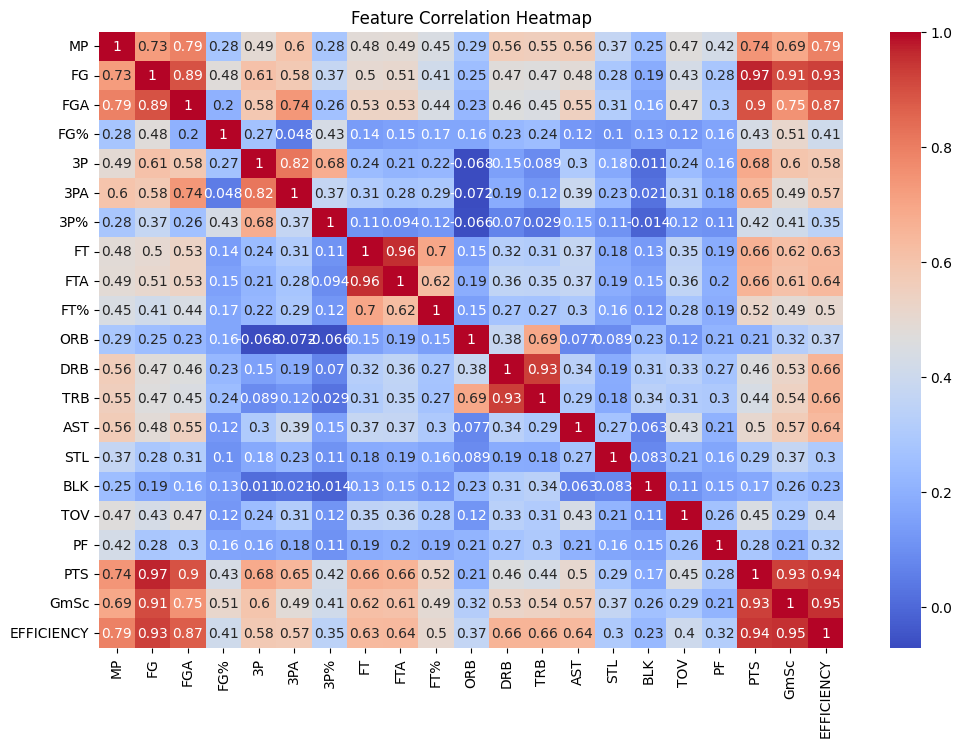

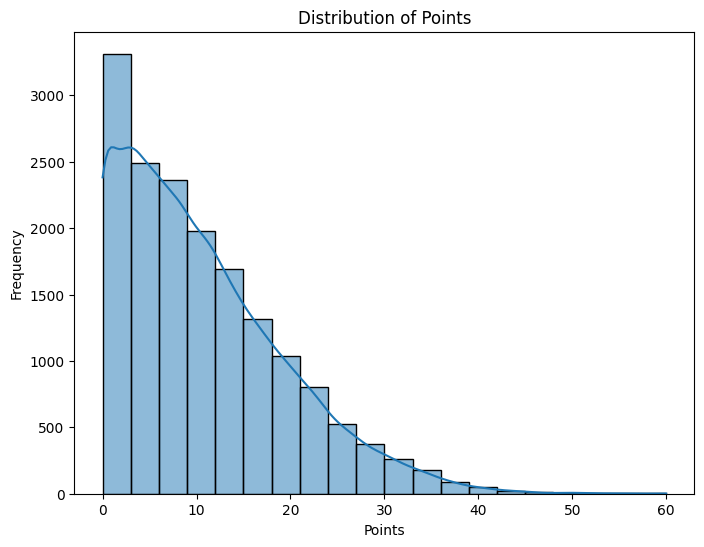

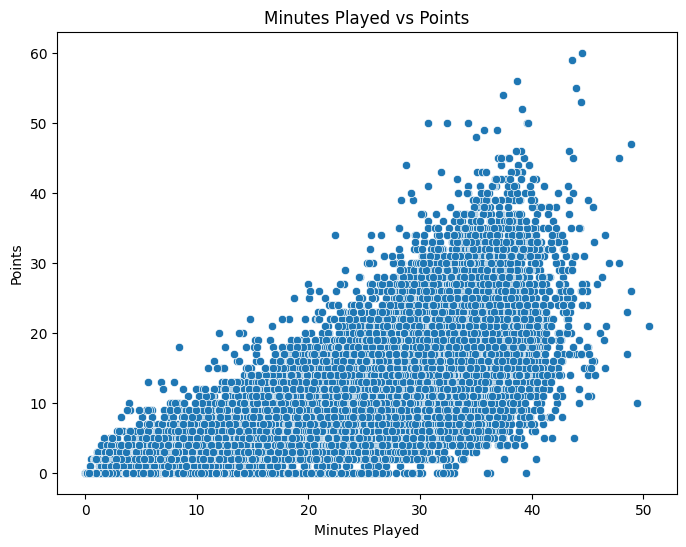

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------------------
# ✅ Convert all columns to numeric safely
numeric_df = df.apply(pd.to_numeric, errors='coerce')

# ✅ Drop columns that are fully NaN (non-numeric originally)
numeric_df = numeric_df.dropna(axis=1, how='all')

# -------------------------------------------
# 📊 Heatmap of correlations (ONLY numeric columns)
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# -------------------------------------------
# 📈 Histogram of Points
plt.figure(figsize=(8, 6))
sns.histplot(numeric_df['PTS'], bins=20, kde=True)
plt.title("Distribution of Points")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

# -------------------------------------------
# 🔍 Scatter plot: Minutes Played vs Points
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MP', y='PTS', data=numeric_df)
plt.title("Minutes Played vs Points")
plt.xlabel("Minutes Played")
plt.ylabel("Points")
plt.show()


## **MODEL BUILDING**

In [40]:
## **MODEL BUILDING**from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor


In [41]:
# Define target variables
y = numeric_df[['PTS', 'TRB', 'AST']]

# Define features by dropping target columns
X = numeric_df.drop(['PTS', 'TRB', 'AST'], axis=1)


## **MODEL BUILDING**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [43]:
# Wrap XGBoost in MultiOutputRegressor for multi-target regression
xgb_model = MultiOutputRegressor(XGBRegressor(random_state=42, n_estimators=100))
xgb_model.fit(X_train, y_train)


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [44]:
xgb_pred = xgb_model.predict(X_test)

# Evaluation for XGBoost
print("🔹 XGBoost Evaluation:")
for i, target in enumerate(['PTS', 'TRB', 'AST']):
    mse = mean_squared_error(y_test.iloc[:, i], xgb_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], xgb_pred[:, i])
    print(f"{target} - RMSE: {mse**0.5:.2f}, R²: {r2:.2f}")


🔹 XGBoost Evaluation:
PTS - RMSE: 0.25, R²: 1.00
TRB - RMSE: 0.06, R²: 1.00
AST - RMSE: 0.82, R²: 0.90


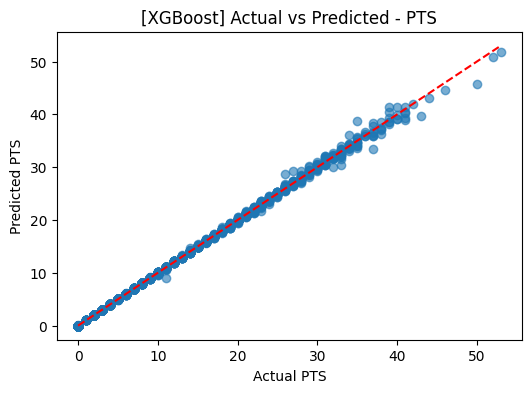

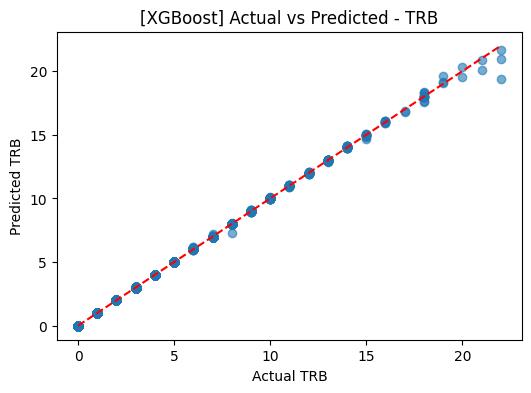

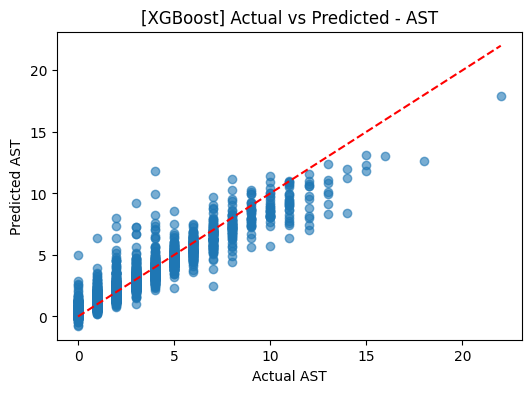

In [45]:
for i, target in enumerate(['PTS', 'TRB', 'AST']):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test.iloc[:, i], xgb_pred[:, i], alpha=0.6)
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--')
    plt.xlabel(f"Actual {target}")
    plt.ylabel(f"Predicted {target}")
    plt.title(f"[XGBoost] Actual vs Predicted - {target}")
    plt.show()


In [46]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [47]:
print("🔹 Random Forest Evaluation:")
for i, target in enumerate(['PTS', 'TRB', 'AST']):
    mse = mean_squared_error(y_test.iloc[:, i], rf_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], rf_pred[:, i])
    print(f"{target} - RMSE: {mse**0.5:.2f}, R²: {r2:.2f}")


🔹 Random Forest Evaluation:
PTS - RMSE: 0.94, R²: 0.99
TRB - RMSE: 0.62, R²: 0.97
AST - RMSE: 1.30, R²: 0.76


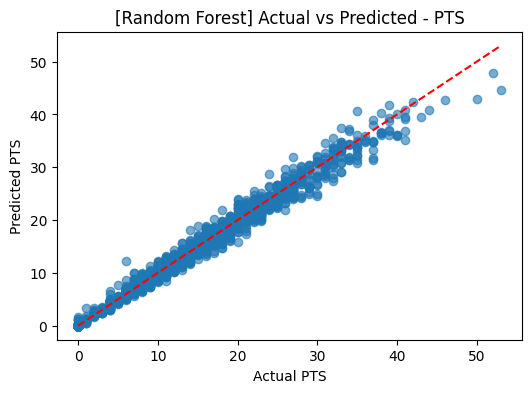

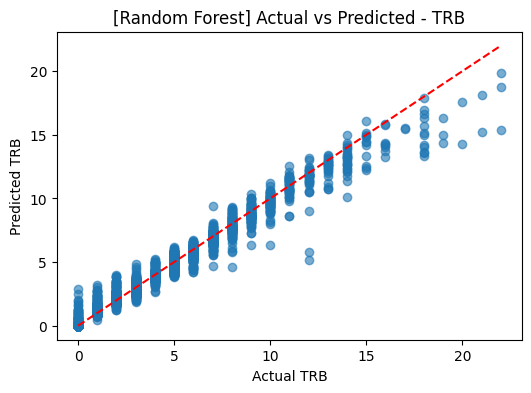

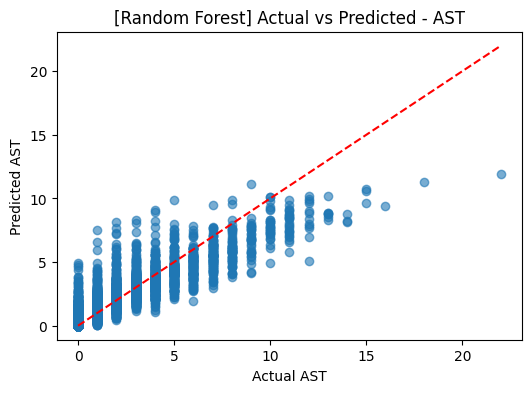

In [48]:
for i, target in enumerate(['PTS', 'TRB', 'AST']):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test.iloc[:, i], rf_pred[:, i], alpha=0.6)
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--')
    plt.xlabel(f"Actual {target}")
    plt.ylabel(f"Predicted {target}")
    plt.title(f"[Random Forest] Actual vs Predicted - {target}")
    plt.show()


In [49]:
def predict_player_performance_avg(player_name, opponent_team):
    player_name = player_name.strip().title()
    opponent_team = opponent_team.strip().upper()

    player_data = df[(df['Player'] == player_name) & (df['Opp'] == opponent_team)]

    if player_data.empty:
        # Relax condition: search only by player name
        player_only = df[df['Player'] == player_name]
        if player_only.empty:
            print(f"❌ Player '{player_name}' not found in the dataset.")
        else:
            print(f"⚠️ No games found for '{player_name}' against '{opponent_team}'.")
            print("📌 But here are the teams this player has played against:")
            print(player_only['Opp'].unique())
        return

    avg_features = player_data[X.columns].mean().to_frame().T
    prediction = xgb_model.predict(avg_features)

    predicted_pts, predicted_trb, predicted_ast = prediction[0]
    print(f"📊 Predicted Stats (Avg vs {opponent_team}) for {player_name}:")
    print(f"  - Points: {predicted_pts:.2f}")
    print(f"  - Rebounds: {predicted_trb:.2f}")
    print(f"  - Assists: {predicted_ast:.2f}")



In [53]:
predict_player_performance_avg("Lebron james", "")


📊 Predicted Stats (Avg vs GSW) for Lebron James:
  - Points: 29.98
  - Rebounds: 8.00
  - Assists: 10.43
